In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-26,331.809998,333.333344,291.666656,292.140015,292.140015,136133700
1,2022-04-27,299.526672,306.000000,292.453339,293.836670,293.836670,76956300
2,2022-04-28,299.993347,300.000000,273.899994,292.503326,292.503326,124948500
3,2022-04-29,300.750000,311.466675,290.000000,290.253326,290.253326,88133100
4,2022-05-02,286.923340,302.119995,282.676666,300.980011,300.980011,75781500


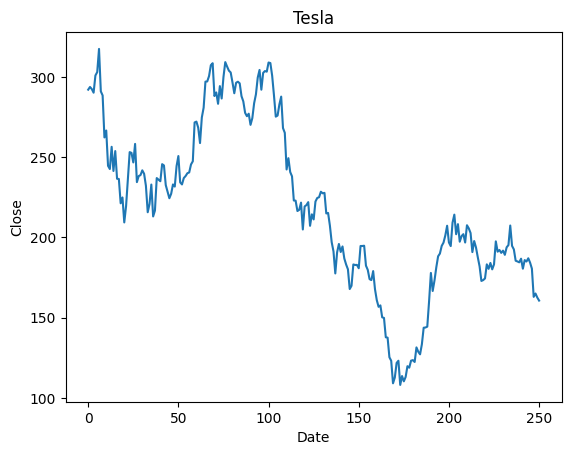

In [30]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [5]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=3)

Epoch 1/3
200/200 [==============================] - 4s 2ms/step - loss: 27630.8066
Epoch 2/3
200/200 [==============================] - 0s 2ms/step - loss: 3364.5930
Epoch 3/3
200/200 [==============================] - 0s 2ms/step - loss: 2351.6179


In [8]:
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 [==============================] - 1s 544ms/step


array([[180.25761]], dtype=float32)